# Introduction
<hr style="border:2px solid black"> </hr>


**What?** LSTM Autoencoder



# What is an LSTM autoencoder?
<hr style="border:2px solid black"> </hr>


- An LSTM Autoencoder is an implementation of an autoencoder for sequence data using an Encoder-Decoder LSTM architecture.
- Once fit, the encoder part of the model can be used to encode or compress sequence.
- Sequence have an **order** and such one of the best architecture we can applied is is LSTM. However, a RNN architecture can also be applied but they somehow perform a bit worse than LSTM in some cases.
- Autoencoder learn a compressed version of the input and this case, LSTM autoencoder, it learn a compressed version of the input sequence.
- **Curiosity** Once the model is trained, the decoder part of the model may be removed, leaving just the encoder model. This model can then be used to encode input sequences to a fixed-length vector.



# Import modules
<hr style="border:2px solid black"> </hr>

In [1]:
from numpy import array
import os
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils.vis_utils import plot_model

# Predict exactly the input
<hr style="border:2px solid black"> </hr>


- Simple because we'll train it to replicate exatclty input sequence.



In [2]:
# define input sequence
sequence = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
# reshape input into [samples, timesteps, features]
n_in = len(sequence)
sequence = sequence.reshape((1, n_in, 1))
print(sequence)

[[[0.1]
  [0.2]
  [0.3]
  [0.4]
  [0.5]
  [0.6]
  [0.7]
  [0.8]
  [0.9]]]


In [3]:
# Define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_in,1)))
model.add(RepeatVector(n_in))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
repeat_vector (RepeatVector) (None, 9, 100)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 9, 100)            80400     
_________________________________________________________________
time_distributed (TimeDistri (None, 9, 1)              101       
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


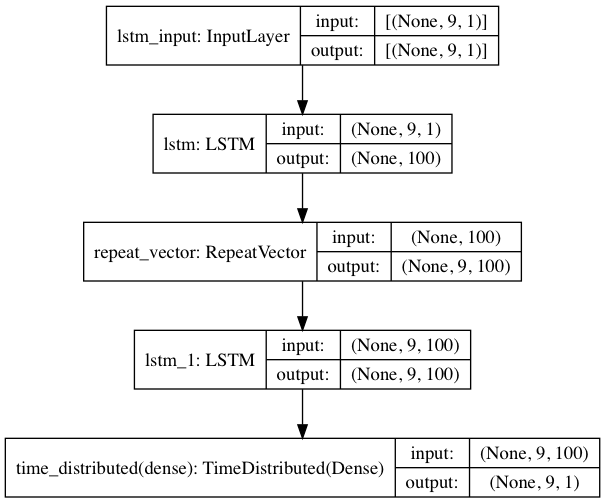

In [5]:
plot_model(model, show_shapes = True)

In [7]:
# Fit model
model.fit(sequence, sequence, epochs=300, verbose=0)

# Predict exactly the ipnut
yhat = model.predict(sequence, verbose=0)

In [8]:
for i in range(len(yhat.reshape(-1,1))):    
    print("Original: ", sequence.reshape(-1,1)[i][0], ", Predicted: ", yhat[0,i,0])

Original:  0.1 , Predicted:  0.1065727
Original:  0.2 , Predicted:  0.2017883
Original:  0.3 , Predicted:  0.29871306
Original:  0.4 , Predicted:  0.3985147
Original:  0.5 , Predicted:  0.49924648
Original:  0.6 , Predicted:  0.60026574
Original:  0.7 , Predicted:  0.70112157
Original:  0.8 , Predicted:  0.8014255
Original:  0.9 , Predicted:  0.9008116


# Predict the next sequence
<hr style="border:2px solid black"> </hr>


- We can modify the reconstruction LSTM Autoencoder to instead predict the next step in the sequence.
- Our input sequence comproised of 9 entries: `[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]`
- We'd like to predict something like this: `[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]`



In [9]:
seq_in = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
# reshape input into [samples, timesteps, features]
n_in = len(seq_in)
seq_in = seq_in.reshape((1, n_in, 1))
# prepare output sequence
seq_out = seq_in[:, 1:, :]
n_out = n_in - 1

In [10]:
seq_in

array([[[0.1],
        [0.2],
        [0.3],
        [0.4],
        [0.5],
        [0.6],
        [0.7],
        [0.8],
        [0.9]]])

In [11]:
seq_out

array([[[0.2],
        [0.3],
        [0.4],
        [0.5],
        [0.6],
        [0.7],
        [0.8],
        [0.9]]])

In [12]:
# Define model
model2 = Sequential()
model2.add(LSTM(100, activation='relu', input_shape=(n_in,1)))
model2.add(RepeatVector(n_out))
model2.add(LSTM(100, activation='relu', return_sequences=True))
model2.add(TimeDistributed(Dense(1)))
model2.compile(optimizer='adam', loss='mse')

In [13]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100)               40800     
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 8, 100)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 8, 100)            80400     
_________________________________________________________________
time_distributed_1 (TimeDist (None, 8, 1)              101       
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


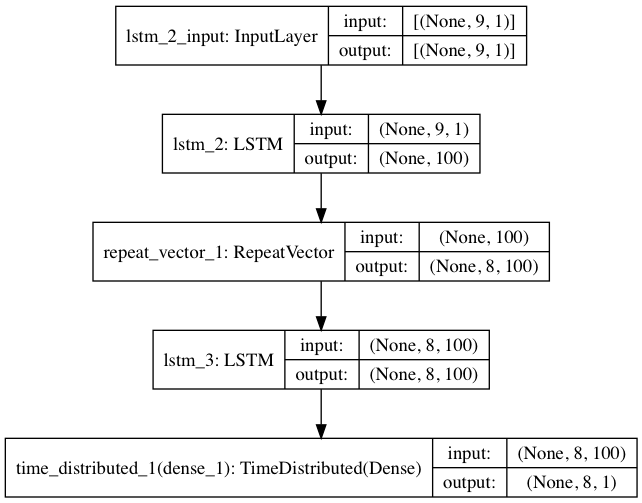

In [14]:
plot_model(model2, show_shapes = True)

In [15]:
# Fit model
model2.fit(seq_in, seq_out, epochs=300, verbose=0)
# Demonstrate prediction
yhat = model2.predict(seq_in, verbose=0)

In [16]:
for i in range(len(yhat.reshape(-1,1))):    
    print("Original: ", sequence.reshape(-1,1)[i][0], ", Predicted (next): ", yhat[0,i,0])

Original:  0.1 , Predicted (next):  0.16884436
Original:  0.2 , Predicted (next):  0.29182625
Original:  0.3 , Predicted (next):  0.4039589
Original:  0.4 , Predicted (next):  0.5086457
Original:  0.5 , Predicted (next):  0.60871196
Original:  0.6 , Predicted (next):  0.70531344
Original:  0.7 , Predicted (next):  0.79944116
Original:  0.8 , Predicted (next):  0.8919674


In [22]:
try:
    os.remove("./model.png")
except:
    pass

# Conclusions
<hr style="border:2px solid black"> </hr>


- We have seen how you on ce the atchitecture if fixed all you need to do is:
    - Create an input and out put sequence.
    - Feed them into the model.
- That is pretty common in a seq2seq models where neither the input and the output are fixed. They can take any values.



In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
repeat_vector (RepeatVector) (None, 9, 100)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 9, 100)            80400     
_________________________________________________________________
time_distributed (TimeDistri (None, 9, 1)              101       
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


In [19]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100)               40800     
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 8, 100)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 8, 100)            80400     
_________________________________________________________________
time_distributed_1 (TimeDist (None, 8, 1)              101       
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


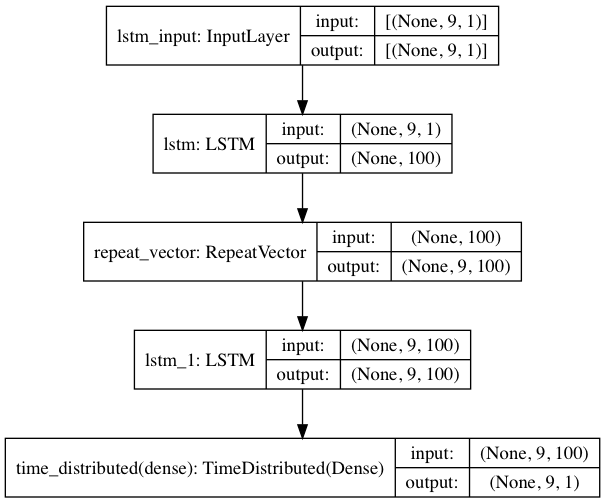

In [20]:
plot_model(model, show_shapes = True)

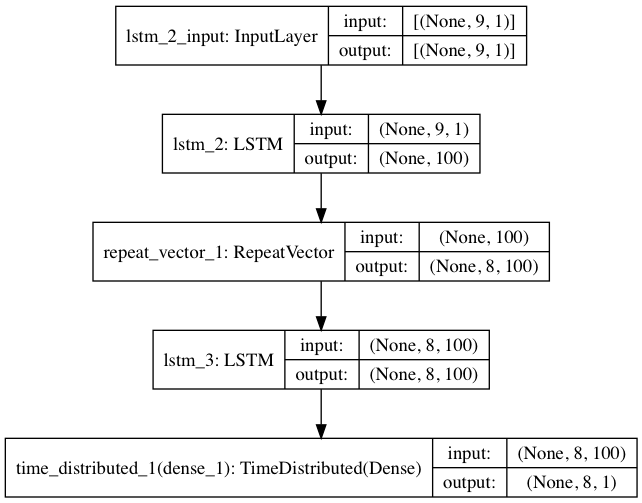

In [21]:
plot_model(model2, show_shapes = True)

# References
<hr style="border:2px solid black"> </hr>


- https://machinelearningmastery.com/lstm-autoencoders/    

